### **"SkillSync: Bridging Talent and Opportunity - An Intelligent Resume and Job Description Matching System"**

The below code is a setup for using Google Drive in a Google Colab notebook. It mounts the user's Google Drive at the "/drive" directory, allowing easy access to files stored on Google Drive. Additionally, it imports the `csv` module for CSV file operations and the `pandas` library for data analysis. This setup is commonly used to seamlessly integrate Google Drive files and leverage powerful data manipulation capabilities provided by pandas in a Colab environment.

In [ ]:
from google.colab import drive
drive.mount("/drive", force_remount=True)
import csv
import pandas as pd

Mounted at /drive


In [ ]:
# Install the PyPDF2 library for working with PDF files
!pip install PyPDF2

### **IMPORTING LIBRARIES**

The provided code helps import essential Python libraries for diverse tasks:

- Data Analysis and Visualization: `pandas` and `matplotlib.pyplot`.
- Text Processing and NLP: `regex`, `nltk` for part-of-speech tagging, tokenization, and stopwords handling.
- Machine Learning: `LabelEncoder`, `TfidfVectorizer`, `CountVectorizer`, `train_test_split`, `OneVsRestClassifier`, `KNeighborsClassifier`, and evaluation metrics from `sklearn`.
- Numerical Operations: `numpy`.
- Text Manipulation: `string` module.
- Text Similarity: `cosine_similarity` for comparing text vectors.
- PDF Handling: `PyPDF2`.

This setup enables a wide range of tasks, including data analysis, NLP, machine learning, and PDF handling.

In [ ]:
# Importing necessary libraries for data manipulation, analysis, and machine learning
import pandas as pd
import matplotlib.pyplot as plt
import regex as re
from nltk import pos_tag, sent_tokenize, word_tokenize
from nltk.corpus import stopwords
import nltk
from sklearn.preprocessing import LabelEncoder
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.multiclass import OneVsRestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn import metrics
from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer
from nltk.tokenize import word_tokenize
import numpy as np
import pandas as pd
import string
import nltk
from sklearn.metrics.pairwise import cosine_similarity
import PyPDF2

The code below downloads essential Natural Language Toolkit (nltk) resources for text processing and prepares the NLTK environment with tokenization models, stopwords, and part-of-speech tagging models, enabling effective text processing tasks.

In [ ]:
# Downloading NLTK resources
nltk.download('punkt')  # Punkt tokenizer models for sentence and word tokenization
nltk.download('stopwords')  # Set of common English stopwords
nltk.download('averaged_perceptron_tagger')  # Averaged perceptron tagger models for part-of-speech tagging

# Initializing a set of English stopwords
stop_words = set(stopwords.words("english"))


[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!


### **IMPORTING DATASETS**

In [ ]:
# Reading the skills dataset from a CSV file
skillset_data = pd.read_csv('/drive/My Drive/Colab Notebooks/IST 664/2023/Project/skills.csv')

# Reading the resume dataset from a CSV file
resume_data = pd.read_csv('/drive/My Drive/Colab Notebooks/IST 664/2023/Project/UpdatedResumeDataSet.csv')

The below code snippet processes the 'Skill' column from the skills dataset by applying a regular expression pattern to filter and extract valid skills. The resulting set, skillset_data, contains cleaned and valid skills ready for further analysis.

In [ ]:
# Extracting the 'Skill' column from the skills dataset
skillset_data = skillset_data['Skill']

# Defining a regular expression pattern for valid skills
pattern = re.compile(r'^[a-zA-Z0-9_\s\-,()&\.\/\+]+$')

# Filtering out non-matching skills based on the defined pattern
skillset_data = [word.rstrip('\n') for word in skillset_data if pattern.match(word)]

# Creating a set of valid skills
skillset_data = set(skillset_data)


### **DATA PREPROCESSING**

The `preprocess_text` function is designed to prepare input text for analysis through the following steps:

1. Convert the text to lowercase.
2. Remove non-alphanumeric characters, while retaining specific symbols.
3. Tokenize sentences and extract individual words.
4. Filter words based on a predefined set of valid skills and remove stop words.

Parameters:
- `text` (str): The input text to be preprocessed.

Returns:
- (str): The processed text after applying the specified transformations.

In [ ]:
def preprocess_text(text):
    text = text.lower()
    text = re.sub('[^a-zA-Z0-9_\s\-,()&\.\/\+]', ' ', text)
    sentences = sent_tokenize(text)
    features = []

    for sent in sentences:
      words = word_tokenize(sent)
      words = [word for word in words if (word in skillset_data and word not in stop_words)]
      features += words
    return " ".join(features)

In [ ]:
# Applying the preprocess_text function to the 'Resume' column of resume_data
resume_data['cleaned'] = resume_data['Resume'].apply(preprocess_text)

### **LABEL ENCODING**

This code snippet utilizes the LabelEncoder from scikit-learn to transform the categorical values in the 'Category' column of the resume_data DataFrame into numerical labels. The encoded labels are then stored in a new column named 'new_Category'. This step is often performed when working with machine learning algorithms that require numerical input for target variables.

In [ ]:
# Creating a LabelEncoder instance to encode the 'Category' column
label = LabelEncoder()

# Applying label encoding to the 'Category' column and creating a new column 'new_Category'
resume_data['new_Category'] = label.fit_transform(resume_data['Category'])

### **VECTORIZATION WITH TF-IDF**

Below code block performs TF-IDF vectorization on the preprocessed text data ('cleaned' column) from the resume_data DataFrame. TF-IDF is a numerical representation of text that reflects the importance of words in a document relative to a collection of documents. The resulting WordFeatures matrix contains TF-IDF features for each document in the dataset.

In [ ]:
# Vectorizing the cleaned text data using TF-IDF (Term Frequency-Inverse Document Frequency)
# Vectorizing the cleaned columns
text = resume_data['cleaned'].values
target = resume_data['new_Category'].values
word_vectorizer = TfidfVectorizer(
    sublinear_tf=True,
    max_features=1500)
word_vectorizer.fit(text)
WordFeatures = word_vectorizer.transform(text)


This code block combines the preprocessed text from the 'cleaned' column of resume_data with the set of valid skills (skillset_data). The combined text is then tokenized into individual words. A DataFrame (skill_counts) is created to count the occurrences of each skill in the tokenized text, providing a summary of skill frequencies in the dataset.

In [ ]:
# Combining the cleaned text from resume_data and skillset_data
combined_text = ' '.join(resume_data['cleaned']) + ' '.join(skillset_data)

# Tokenizing the combined text
tokenized_text = word_tokenize(combined_text)

# Creating a DataFrame to count the occurrences of each skill
skill_counts = pd.Series(tokenized_text).value_counts().reset_index()
skill_counts.columns = ['Skill', 'Count']

### **DATA VISUALIZATION**

Code used below filters the top 20 skills from the skill_counts DataFrame, excluding skills that contain numbers. It then plots a bar chart using seaborn (sns) to visualize the distribution of these top skills based on their occurrence counts. The resulting chart provides insights into the frequency distribution of the most prevalent skills in the dataset.

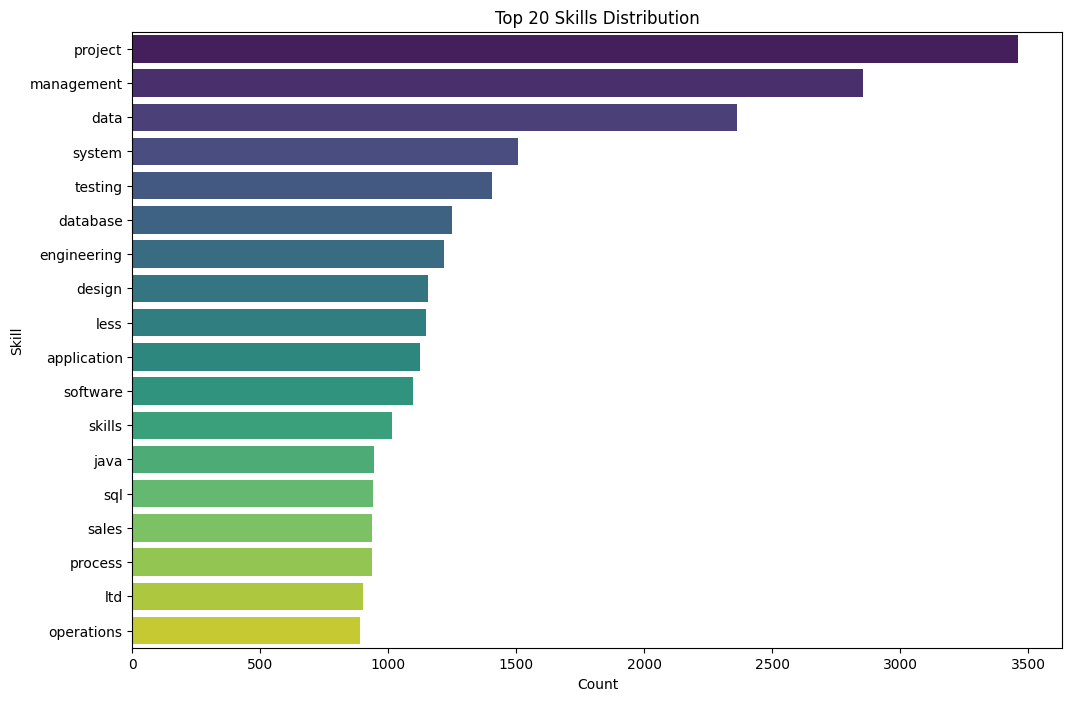

In [ ]:
# Filtering the top 20 skills, excluding those containing numbers
top_skills = skill_counts.head(20)
top_skills = top_skills[top_skills['Skill'].apply(lambda x: x.isalpha())]

# Plotting a bar chart to visualize the distribution of the top 20 skills
plt.figure(figsize=(12, 8))
sns.barplot(x='Count', y='Skill', data=top_skills, palette='viridis')
plt.title('Top 20 Skills Distribution')
plt.xlabel('Count')
plt.ylabel('Skill')
plt.show()


Below code snippet generates a countplot to visualize the distribution of resume categories. It replaces the numeric category values on the y-axis with their corresponding category names to enhance interpretability. The resulting plot provides insights into the distribution of resumes across different categories.

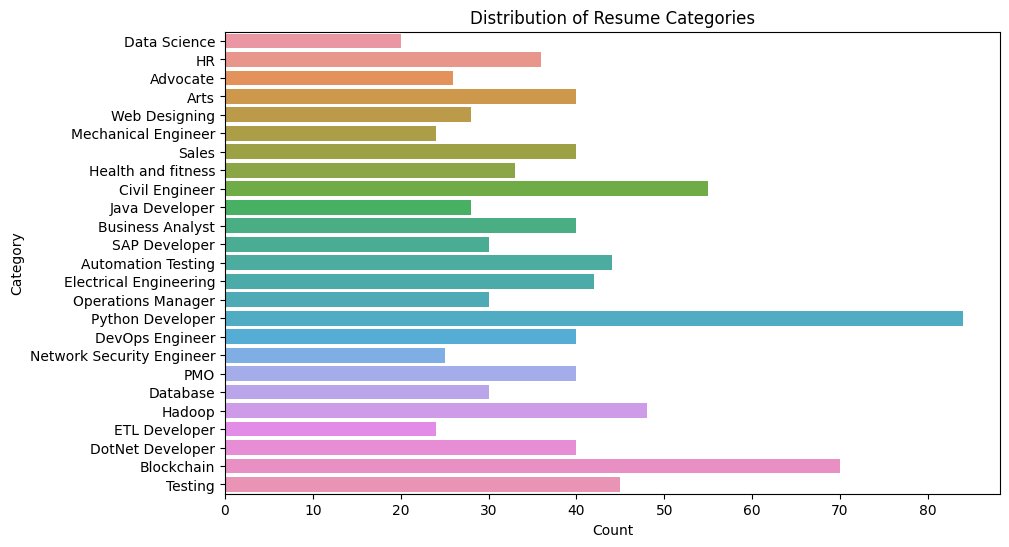

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

category_names = resume_data['Category'].unique()

# Visualizing the distribution of categories
plt.figure(figsize=(10, 6))
sns.countplot(y='new_Category', data=resume_data)

# Replace numeric category values with category names
plt.yticks(range(len(category_names)), category_names)

plt.title('Distribution of Resume Categories')
plt.xlabel('Count')
plt.ylabel('Category')
plt.show()


### **TEST-TRAIN SPLIT ON WORD FEATURES**

Code from below performs splitting the data into training and testing sets using the `train_test_split` function from scikit-learn. The feature matrix `WordFeatures` and the target variable `target` are divided into two sets: `X_train` and `X_test` for features, and `y_train` and `y_test` for target labels. The split is performed with a random seed (`random_state=24`) for reproducibility, and the testing set size is specified as 20% (`test_size=0.2`). The code then prints the shapes of the training and testing sets to provide information about the size of the datasets.

In [ ]:
# Separate train and test data
X_train, X_test, y_train, y_test = train_test_split(WordFeatures, target, random_state=24, test_size=0.2)

# Print the first 5 data points for training set
print("Training Set:")
print("X_train shape:", X_train.shape)

# Print the first 5 data points for testing set
print("\nTesting Set:")
print("X_test shape:", X_test.shape)

Training Set:
X_train shape: (769, 1500)

Testing Set:
X_test shape: (193, 1500)


### **KNN CLASSIFIER**

The k-Nearest Neighbors (KNN) algorithm is used here for classification. KNN is a simple and intuitive machine learning algorithm that classifies data points based on the majority class of their k-nearest neighbors in the feature space. It is a non-parametric and instance-based learning algorithm, meaning it makes predictions based on the similarity of new data points to existing labeled data.

In this specific code, a `KNeighborsClassifier` is created and trained on the training data (`X_train` and `y_train`). The model then predicts the classes of the test data (`X_test`) based on their proximity to the labeled instances in the training set.

KNN is suitable for this scenario because it does not assume any underlying distribution of the data, making it versatile for various types of datasets. Additionally, KNN can be effective when the decision boundary is complex and not easily captured by a simple parametric model.

In [ ]:
# Importing the KNeighborsClassifier from scikit-learn
from sklearn.neighbors import KNeighborsClassifier

# Creating a KNeighborsClassifier model with default parameters
model = KNeighborsClassifier()

# Fitting the model to the training data
model.fit(X_train, y_train)

# Making predictions on the test set
y_pred = model.predict(X_test)

In [ ]:
# Print the first 5 samples of ground truth and predicted values
for true_value, predicted_value in zip(y_test[:5], y_pred[:5]):
    print(f"Ground Truth: {true_value}, Predicted: {predicted_value}")

Ground Truth: 22, Predicted: 22
Ground Truth: 10, Predicted: 10
Ground Truth: 16, Predicted: 16
Ground Truth: 1, Predicted: 1
Ground Truth: 6, Predicted: 6


### **PERFORMANCE EVALUATION**

Code below is used to get accuracy of model. The obtained accuracies represent the performance of the k-Nearest Neighbors (KNN) classifier on both the training and validation sets.

1. **Training Accuracy (98.05%):** This indicates the percentage of correctly classified instances in the training set. A high training accuracy suggests that the model has learned well from the training data.

2. **Validation Accuracy (93.26%):** This represents the percentage of correctly classified instances in the test (validation) set. It gives an indication of how well the model generalizes to unseen data.

3. **Overall Model Score (95.66%):** This is the mean of the training and validation accuracies, providing an overall assessment of the model's performance. In this case, it indicates that, on average, the model correctly classifies approximately 95.66% of instances.

These accuracy metrics are crucial for evaluating the effectiveness of the model in making predictions and assessing its generalization performance. The high training accuracy coupled with a relatively high validation accuracy suggests that the model is performing well and is not overfitting to the training data.

In [ ]:
# Getting the model score on the training set
training_accuracy = model.score(X_train, y_train)

# Getting the model score on the test set
validation_accuracy = model.score(X_test, y_test)

# Calculating the overall model score (mean of training and validation accuracies)
overall_model_score = (training_accuracy + validation_accuracy) / 2

# Printing the results
print(f'---------------------------------\n| Training Accuracy   :- {(training_accuracy*100).round(2)}% |')
print(f'---------------------------------\n| Validation Accuracy :- {(validation_accuracy*100).round(2)}% |')
print(f'---------------------------------\n| Overall Model Score  :- {(overall_model_score*100).round(2)}% |\n---------------------------------')


---------------------------------
| Training Accuracy   :- 98.05% |
---------------------------------
| Validation Accuracy :- 93.26% |
---------------------------------
| Overall Model Score  :- 95.66% |
---------------------------------


### **CLASSIFIFCATION REPORT**

The `classification_report` function from scikit-learn's `metrics` module provides a comprehensive summary of classification performance, including precision, recall, and F1-score for each class, as well as support and the average metrics

Explanation of the key metrics in the classification report:

- **Precision:** Precision is the ratio of correctly predicted positive observations to the total predicted positives. It is a measure of how many correctly predicted instances of a class are relevant.

- **Recall (Sensitivity or True Positive Rate):** Recall is the ratio of correctly predicted positive observations to the all observations in actual class. It is a measure of how many relevant instances of a class were correctly predicted.

- **F1-score:** The F1-score is the harmonic mean of precision and recall. It provides a balance between precision and recall. F1-score is useful when there is an uneven class distribution.

- **Support:** Support is the number of actual occurrences of the class in the specified dataset. It's the number of samples of the true response that lie in that class.

- **Accuracy:** Accuracy is the ratio of correctly predicted instances to the total instances. While accuracy is a good overall measure, it may not be suitable for imbalanced datasets.

Printing the classification report allowed us to assess the model's performance on each class individually and understand its strengths and weaknesses for different categories. It's a valuable tool for evaluating the model's precision, recall, and overall effectiveness in multi-class classification tasks.

In [ ]:
# Printing the classification report
print(metrics.classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       1.00      0.50      0.67         4
           1       1.00      1.00      1.00         9
           2       1.00      0.67      0.80         6
           3       1.00      1.00      1.00         9
           4       0.75      1.00      0.86         3
           5       1.00      1.00      1.00         3
           6       0.67      0.57      0.62         7
           7       1.00      1.00      1.00         6
           8       1.00      1.00      1.00        10
           9       1.00      0.67      0.80         6
          10       1.00      1.00      1.00        10
          11       0.80      1.00      0.89         8
          12       0.40      0.33      0.36         6
          13       1.00      1.00      1.00         6
          14       1.00      1.00      1.00         8
          15       1.00      1.00      1.00        16
          16       1.00      1.00      1.00         7
          17       1.00    

### **DESIGNING EXTRACTION FUNCTION**

The `extract_text_from_pdf` function is designed to read the content from a PDF file. It uses the PyPDF2 library, a Python library for reading PDF files. Here's a brief explanation of its functionality:

- **Input:**
  - `file_path`: The path to the PDF file from which text needs to be extracted.

- **Output:**
  - `text`: A string containing the extracted text from the PDF.

- **Functionality:**
  - The function opens the specified PDF file in binary read mode (`'rb'`).
  - It creates a `PdfReader` object from PyPDF2 for reading the PDF.
  - It determines the total number of pages in the PDF (`num_pages`).
  - It initializes an empty string (`text`) to accumulate the extracted text.
  - It iterates through each page of the PDF, extracts the text from each page, and appends it to the `text` string.
  - Finally, it returns the concatenated text.

Therefore, this function provides a simple way to extract the text content from a PDF file using the PyPDF2 library, making it useful for tasks that require processing or analyzing the textual content of PDF documents.

In [ ]:
def extract_text_from_pdf(file_path):
    """
    Extracts text content from a PDF file.

    Parameters:
    - file_path (str): The path to the PDF file.

    Returns:
    - str: The extracted text from the PDF.
    """
    # Open the PDF file in binary read mode
    with open(file_path, 'rb') as file:
        # Create a PdfReader object
        pdf_reader = PyPDF2.PdfReader(file)

        # Get the total number of pages in the PDF
        num_pages = len(pdf_reader.pages)

        # Initialize an empty string to accumulate extracted text
        text = ''

        # Iterate through each page and extract text
        for page_num in range(num_pages):
            # Get the current page
            page = pdf_reader.pages[page_num]

            # Append the extracted text from the page to the overall text
            text += page.extract_text()

    # Return the concatenated text
    return text

### **MODELING SIMILARITY MEASURE**
The `calculate_similarity` function is a vital component in the resume-job matching system. It computes the cosine similarity percentage between a vectorized resume and a job description. This similarity score, ranging from 0 to 100, indicates how closely the content of a resume aligns with the requirements of a specific job.

In practical terms, the function transforms the job description into a vectorized form, performs cosine similarity calculation with the vectorized resume, and then converts the score into a percentage, rounded to two decimal places. This percentage is a crucial metric for assessing the degree of similarity, guiding the system to recommend job opportunities that best match the skills and content of a given resume. Overall, this function plays a pivotal role in the effective matching of resumes with relevant job opportunities.

In [ ]:
def calculate_similarity(vectorized_resume, job_desc):

    # Transform the job description into a vectorized form
    vectorized_job_desc = vectorizer.transform([job_desc])

    # Calculate the cosine similarity score
    cosine_similarity_score = cosine_similarity(vectorized_resume, vectorized_job_desc)

    # Convert the similarity score to a percentage and round to two decimal places
    similarity_percentage = np.round(cosine_similarity_score[0][0] * 100, 2)

    return similarity_percentage


### **JOB SCREENING**

Job matching is vital for efficient recruitment and employment processes. It ensures that candidates are connected with positions that align with their skills and aspirations, leading to benefits such as an efficient hiring process, improved candidate experience, higher employee satisfaction, and optimized skill utilization. Effective job matching reduces turnover, enhances productivity, and contributes to strategic workforce planning. It enables organizations to adapt to change and fosters a harmonious work environment by aligning the right talent with the right opportunities. Thus, this code is designed to support this functionality.

### **LOADING DATASETS**

The job descriptions are loaded from a CSV file, focusing on the 'Job Title' and 'Job Description' columns while discarding rows with missing values. This step ensures a clean dataset for further processing.

In [ ]:
# Read job descriptions from the CSV file
jobs = pd.read_csv('/drive/My Drive/Colab Notebooks/IST 664/2023/Project/job_descriptions.csv')

# Keep only the 'Job Title' and 'Job Description' columns, and drop any rows with missing values
jobs = jobs[['Job Title', 'Job Description']].dropna()

### **TEXT PRE-PROCESSING**

The resume text is read from a PDF file and preprocessed, converting it to lowercase and removing non-alphanumeric characters. The Count Vectorizer from scikit-learn is then employed to convert the preprocessed text into a numerical format, creating a document-term matrix that represents word frequencies. This numerical representation is essential for training machine learning models.

In [ ]:
# Read resume text
resume_text = extract_text_from_pdf('/drive/My Drive/Colab Notebooks/IST 664/2023/Project/GradStudentResume_sample.pdf')

# Preprocess resume text
resume_text_processed = preprocess_text(resume_text)

# Count Vectorizer
vectorizer = CountVectorizer()

This step below involves preprocessing the job descriptions by applying the preprocess_text function to clean and prepare the text data for further analysis. The processed text is then stored in a new 'processed' column in the DataFrame.

In [ ]:
# Preprocess job descriptions
jobs['processed'] = jobs['Job Description'].apply(preprocess_text)

### **VECTORIZATION**

In the below step, the `CountVectorizer` is used to convert the preprocessed resume text (`resume_text_processed`) into a numerical format suitable for machine learning algorithms. The `fit_transform` method is employed to learn the vocabulary and transform the resume text into a sparse matrix of word counts. The resulting `vectorized_resume` represents the resume in a format that can be utilized by machine learning models for tasks like job matching and classification.

In [ ]:
# Vectorize resume
vectorized_resume = vectorizer.fit_transform([resume_text_processed])

The below code calculates how closely the graduate student's resume matches different job descriptions. The `calculate_similarity` function measures this similarity using cosine scores. Higher scores indicate better alignment between the resume and job requirements. These similarity scores help identify and rank job opportunities that closely match the student's skills, providing personalized recommendations.

In [ ]:
# Calculating similarity scores for grad resume
jobs['similarity'] = jobs['processed'].apply(lambda x: calculate_similarity(vectorized_resume, x))

## **OBTAINING MATCHED JOBS**

The below code section filters job matches by considering only those with a similarity score greater than 0. It creates a DataFrame called `filtered_matches` containing unique job titles, their descriptions, and the corresponding similarity scores. The data is sorted in descending order based on similarity, and only the top match for each job title is retained. Finally, the filtered job descriptions are printed, providing a concise list of relevant job opportunities with their respective similarity scores.

In [ ]:
# Print the most similar job title and its similarity score
print(f"Most Similar Job Title: {jobs.loc[jobs['similarity'].idxmax(), 'Job Title']}")
print(f"Similarity Score: {jobs['similarity'].max()}")

Most Similar Job Title: Financial Controller
Similarity Score: 53.23


In [ ]:
# Filtering job matches with a similarity score greater than 0
filtered_matches = jobs[jobs['similarity'] > 0][['Job Title', 'Job Description', 'similarity']].sort_values("similarity", ascending=False).groupby('Job Title').head(1)

# Printing the filtered job descriptions
print("Below are the job descriptions matching with the resume:")
print(filtered_matches)


Below are the job descriptions matching with the resume:
                                   Job Title  \
736289                   Project Coordinator   
1506174                 Financial Controller   
1112604                   Back-End Developer   
111848                     Financial Analyst   
1550589                         Data Analyst   
...                                      ...   
1117969  Pharmaceutical Sales Representative   
1501304                 Sales Representative   
1457618                        Family Lawyer   
1476091                        Legal Counsel   
216429                       Product Manager   

                                           Job Description  similarity  
736289   Administrative Coordinators support administra...       53.23  
1506174  Finance Managers oversee an organizations fina...       53.23  
1112604  An API Developer creates and maintains applica...       47.68  
111848   Investment Analysts analyze financial data and...       47.68  
1

### **OBTAINING TOP 10 JOB MATCHES**

The below code part extracts the top 10 job matches based on similarity scores. It creates a DataFrame named `top_10_matches` containing unique job titles, their descriptions, and the corresponding highest similarity scores. The data is sorted in descending order based on similarity, and only the top match for each job title is retained. Subsequently, a bar graph is plotted using seaborn to visually represent the similarity scores for the top 10 job matches. This graphical representation offers a quick overview of the most relevant job opportunities that closely align with the given resume.

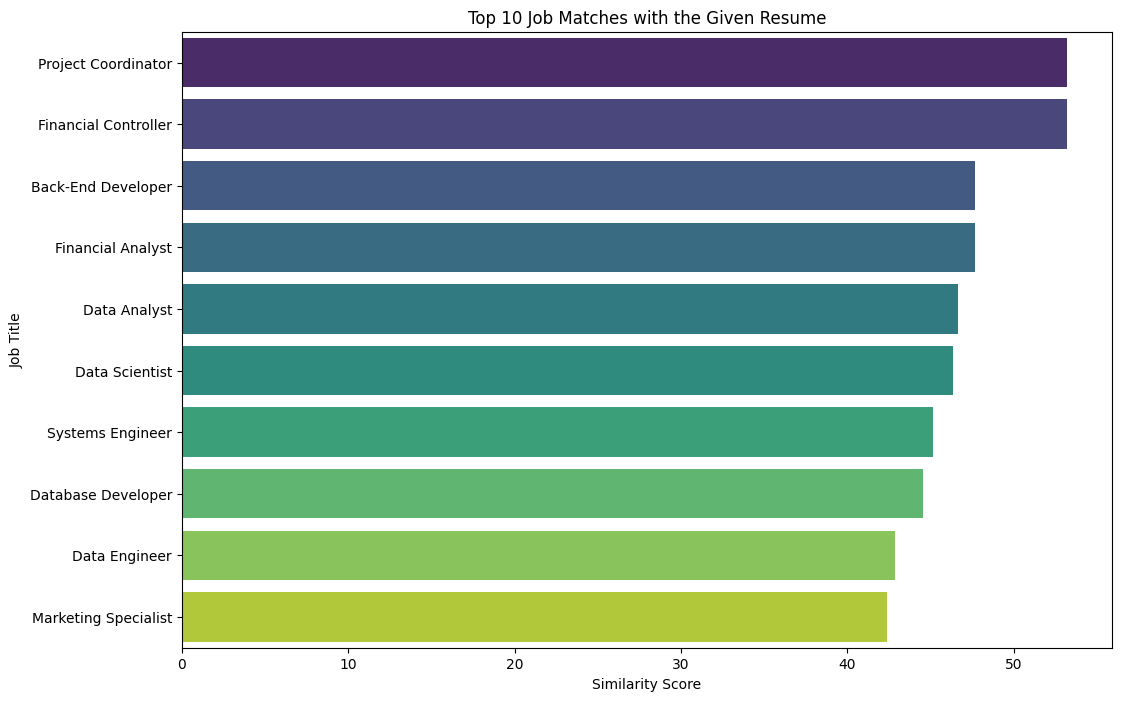

In [ ]:
# Extracting the top 10 job matches based on similarity scores
top_10_matches = jobs[['Job Title', 'Job Description', 'similarity']].sort_values("similarity", ascending=False).groupby('Job Title').head(1).head(10)

# Plotting a bar graph for the top 10 job matches
plt.figure(figsize=(12, 8))
sns.barplot(x='similarity', y='Job Title', data=top_10_matches, palette='viridis')
plt.title('Top 10 Job Matches with the Given Resume')
plt.xlabel('Similarity Score')
plt.ylabel('Job Title')
plt.show()


### **DESIGNING MISSED SKILLS FUNCTIONALITY**

The function, `find_missing_skills`, compares two input strings (presumably representing words or skills). Here's an explanation of its purpose:

1. **Splitting Strings:** The function first splits the input strings into lists of words using the `split()` method.

2. **Lowercasing:** It then converts all words to lowercase to ensure a case-insensitive comparison. This is important because uppercase and lowercase versions of the same word should be treated as equal.

3. **Finding Unique Words:** The function identifies unique words in the first string that are not present in the second string. It does this by creating sets of lowercased words and finding the set difference.

4. **Removing Stop Words:** The function further filters out any stop words from the list of unique words. Stop words are common words (like "and," "the," etc.) that are often excluded from text analysis as they typically don't carry significant meaning.

5. **Returning Missing Skills:** The final result is a list of missing skills that are present in the first string but not in the second, excluding common stop words. This list represents the skills that may be absent in one context but present in another.

Overall, this function is useful for identifying the skills that are mentioned in one set of text (e.g., a job description).

In [ ]:
def find_missing_skills(string1, string2):
    # Splitting the strings into lists of words
    words1 = string1.split()
    words2 = string2.split()

    # Converting words to lowercase to ensure case-insensitive comparison
    words1_lower = [word.lower() for word in words1]
    words2_lower = [word.lower() for word in words2]

    # Finding words in string 1 that are not in string 2
    unique_words = set(words1_lower) - set(words2_lower)
    missing_skills = [word for word in unique_words if word not in stop_words]
    return list(missing_skills)

### **FUNCTIONALITY OF COMPARISION**

The function, `compare_resume_with_job_description`, takes a resume file path and a job description as input and performs the following steps:

1. **Extract Text from PDF:** It uses the `extract_text_from_pdf` function to extract text content from the provided resume PDF file.

2. **Text Preprocessing:** The extracted resume text is then preprocessed using the `preprocess_text` function, which includes converting the text to lowercase and removing non-alphanumeric characters and stop words.

3. **Job Description Preprocessing:** Similarly, the provided job description is preprocessed using the same `preprocess_text` function.

4. **Finding Missing Skills:** The `find_missing_skills` function is then called with the preprocessed resume text and job description as inputs. This function identifies skills present in the job description but not in the resume.

5. **Vectorization:** The preprocessed resume text is vectorized using the `CountVectorizer` to create a numerical representation suitable for machine learning models.

6. **Calculating Similarity:** The `calculate_similarity` function is called with the vectorized resume and the preprocessed job description to determine the similarity percentage between them.

7. **Returning Results:** The function returns a tuple containing the similarity percentage and a list of missing skills.

Thus, this function provides a comprehensive analysis of the match between a resume and a job description. It identifies missing skills on the resume, calculates the similarity between the two documents, and returns these insights for further examination or presentation.

In [ ]:
def compare_resume_with_job_description(resume_path, job_description):

    # Extract text from the provided resume PDF
    resume_text = extract_text_from_pdf(resume_path)

    # Preprocess the resume text
    resume_text_processed = preprocess_text(resume_text)

    # Preprocess the job description text
    job_description_processed = preprocess_text(job_description)

    # Find missing skills in the resume compared to the job description
    missing_skills = find_missing_skills(resume_text_processed, job_description_processed)

    # Vectorize the preprocessed resume text using CountVectorizer
    vectorizer = CountVectorizer()
    vectorized_resume = vectorizer.fit_transform([resume_text_processed])

    # Calculate the similarity between the vectorized resume and job description
    similarity_percentage = calculate_similarity(vectorized_resume, job_description_processed)

    # Return the results as a tuple
    return similarity_percentage, missing_skills


### **VERIFYING MATCHED AND UNMATCHED SKILLS:**

The code snippet below facilitates the comparison between a user-uploaded or default resume and a pasted job description. Users can either upload their resume or use a predefined file path. Upon inputting a job description, the `compare_resume_with_job_description` function is invoked, which processes the resume and job description, calculates their similarity, and identifies any missing skills. The results, including the similarity percentage and a list of missing skills (if any), are then printed for the user's review. This interactive approach enables individuals to quickly assess how well their resume aligns with a given job opportunity and identifies areas where their skills may fall short.

In [ ]:
from google.colab import files

# Uncomment the line below to enable file upload
# resume_path = files.upload()

# If no file is uploaded, use a default file path
resume_path = '/drive/My Drive/Colab Notebooks/IST 664/2023/Project/GradStudentResume_sample.pdf'  # Provide the default file path

job_description = input("Paste job description here: ")
results = compare_resume_with_job_description(resume_path, job_description)

# Printing the similarity and missing skills information
print(f'The similarity between the resume and job description is {results[0]:.2%}')

if results[1]:
    print('The missing skills on your resume are:')
    for skill in results[1]:
        print(f"- {skill}")
else:
    print('No missing skills found.')


Paste job description here: You have an undergraduate or graduate degree in computer science or similar technical field, with significant coursework in mathematics or statistics You have 1-2 years industry machine learning experience You have successfully trained and deployed a deep learning machine model (image, NLP, video, or audio) into production, with measurably improved performance over baseline, either in industry or as a personal project You have strong experience with a high-level machine learning frameworks such as Tensorflow, Caffe, or Torch, and familiarity with the others You know the ins and outs of Python, especially as it applies to the above ML frameworks You are capable of quickly coding and prototyping data pipelines involving any combination of Python, Node, bash, and linux command-line tools, especially when applied to large datasets consisting of millions of files You have a working knowledge of the following technologies, or are not afraid of picking it up on the

### **SIMILARITY PLOT**

The code below generates a bar plot displaying the top 10 matched skills between a resume and a job description. It uses a Counter to count the occurrences of each skill in the resume, excluding those identified as missing. The plot provides a visual representation of the most relevant skills in the resume that align with the job description, aiding in quickly identifying key qualifications. Different colors are assigned to each bar for visual distinction.

The similarity between the resume and job description is 4106.00%


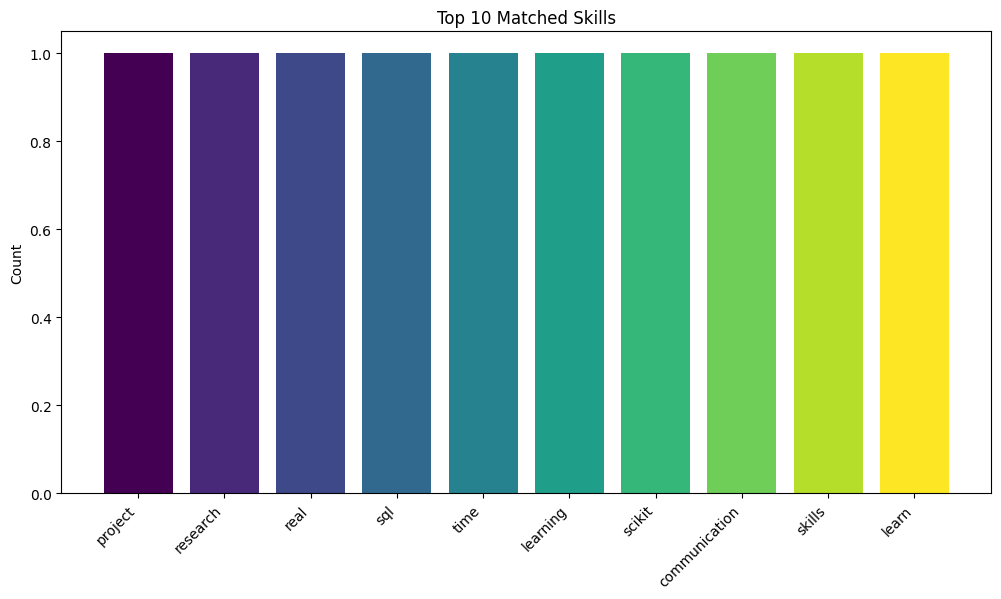

In [ ]:
from google.colab import files
import matplotlib.pyplot as plt
from collections import Counter

# Printing the similarity and missing skills information
print(f'The similarity between the resume and job description is {results[0]:.2%}')

if results[1]:
    # Create a bar plot for the top 10 matched skills
    matched_skills_counter = Counter(set(vectorizer.get_feature_names_out()) - set(results[1]))
    top_matched_skills = matched_skills_counter.most_common(10)

    # Choose a color palette for the bars
    colors = plt.cm.viridis(np.linspace(0, 1, len(top_matched_skills)))

    plt.figure(figsize=(12, 6))
    plt.bar(range(len(top_matched_skills)), [count for skill, count in top_matched_skills], color=colors)
    plt.xticks(range(len(top_matched_skills)), [skill for skill, count in top_matched_skills], rotation=45, ha='right')
    plt.ylabel('Count')
    plt.title('Top 10 Matched Skills')
    plt.show()


### **DISSIMILARITY SCORE**

The code below generates a colorful histogram illustrating the top 10 missing skills between a resume and a job description. It calculates the dissimilarity percentage and identifies skills that are lacking in the resume concerning the job requirements. The histogram provides a visual representation of the most crucial skills that need improvement or inclusion in the resume. Each bar is assigned a different color for visual clarity.

The dissimilarity between the resume and job description is 4106.00%


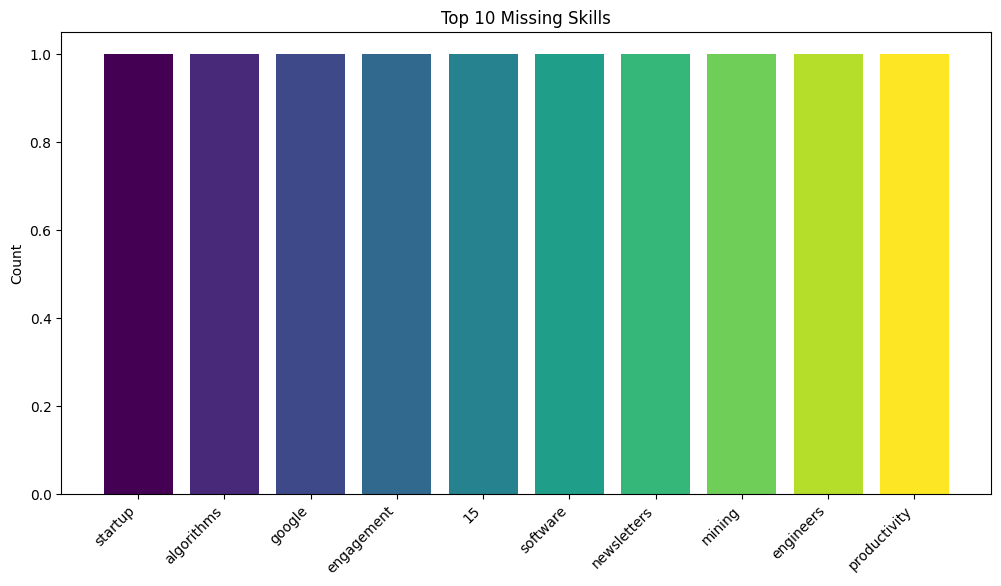

In [ ]:
from google.colab import files
import matplotlib.pyplot as plt
from collections import Counter

# Printing the similarity and missing skills information
print(f'The dissimilarity between the resume and job description is {results[0]:.2%}')

if results[1]:
    # Create a histogram for the top 10 missing skills with colorful bars
    missing_skills_counter = Counter(results[1])
    top_missing_skills = missing_skills_counter.most_common(10)

    # Choose a color palette for the bars
    colors = plt.cm.viridis(np.linspace(0, 1, len(top_missing_skills)))

    plt.figure(figsize=(12, 6))
    plt.bar(range(len(top_missing_skills)), [count for skill, count in top_missing_skills], color=colors)
    plt.xticks(range(len(top_missing_skills)), [skill for skill, count in top_missing_skills], rotation=45, ha='right')
    plt.ylabel('Count')
    plt.title('Top 10 Missing Skills')
    plt.show()


### **VISUALIZING CORRELATION**

This below code generates a heatmap representing the presence or absence of each skill in the resume concerning the job description. The binary matrix is constructed with two columns: one indicating missing skills (labeled as 'Unmatched Skills' in blue) and the other indicating matched skills (labeled as 'Matched Skills' in coral). The heatmap visually highlights the skills that are present or absent in the resume, providing a comprehensive overview of the alignment between the resume and the job requirements. The custom colors help distinguish between matched and unmatched skills, enhancing the interpretability of the heatmap.

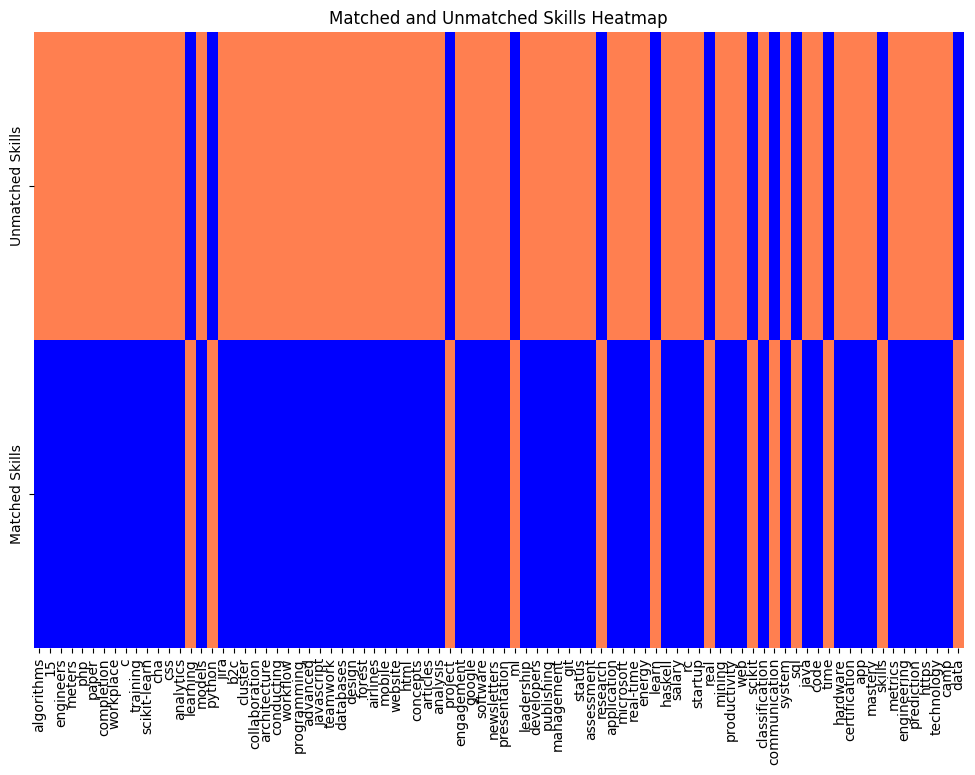

In [ ]:
import seaborn as sns
import numpy as np

# Create a binary matrix indicating presence/absence of each skill in the resume
binary_matrix = np.zeros((len(all_skills), 2))
for i, skill in enumerate(all_skills):
    binary_matrix[i, 0] = 1 if skill in results[1] else 0  # 1 for missing skills
    binary_matrix[i, 1] = 1 if skill not in results[1] else 0  # 1 for matched skills

# Define custom colors
colors = {'Unmatched Skills': 'blue', 'Matched Skills': 'coral'}

# Create a heatmap with custom colors
plt.figure(figsize=(12, 8))
sns.heatmap(binary_matrix.T, cmap=[colors[col] for col in ['Unmatched Skills', 'Matched Skills']], annot=False, cbar=False, xticklabels=list(all_skills), yticklabels=['Unmatched Skills', 'Matched Skills'])
plt.title('Matched and Unmatched Skills Heatmap')
plt.show()
